# House Price- Advance Regration Technique

Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook


In [2]:
global_metrics = pd.DataFrame(columns=['Mean Squared LogError', 'R2_Score'])

# Load Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Convert id as index
data = pd.read_csv('/content/drive/MyDrive/housePrices_art/train.csv', index_col='Id') 
data.head()

# last col "SalesPrice" is out target

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Preproceesing - EDA, Feature Engineering, Feature Selection, Outlier Treatment and Missing Treatment

In [5]:
df = data.copy()

In [6]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [9]:
df.isnull()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
5,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1457,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1458,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum().sort_values(ascending=False).iloc[:20,]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
dtype: int64

## Removed Column with More than 50% missing values

In [11]:
df.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], inplace=True)


In [12]:
df.isnull().sum().sort_values(ascending=False)

LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
               ... 
BsmtUnfSF         0
TotalBsmtSF       0
MSZoning          0
HeatingQC         0
SalePrice         0
Length: 75, dtype: int64

## Categorical Feature Encoding

In [13]:
df.head ()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [14]:
str(df.dtypes.values[1]) == 'object'   # data k str er convert kore, object er sather compare korlam

True

In [15]:
object_columns = [df.columns[i] for i in range(df.dtypes.shape[0]) if str(df.dtypes.values[i]) == 'object']  # getting object columns
object_columns   # we will convert this object col to nemerical values

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

#### Encoding

In [16]:
df[['MSZoning']].value_counts()

MSZoning
RL          1151
RM           218
FV            65
RH            16
C (all)       10
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['MSZoning'] = encoder.fit_transform(df['MSZoning'])

In [18]:
df  # see MS Zonin gas encoded

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,3,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,3,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,3,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,3,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,3,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,3,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,3,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500


In [19]:
df.head()  # see all are numerical  value

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,3,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,3,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,3,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,3,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [20]:
df.info()  # see MSZoing dtype int64 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [21]:
for col in object_columns[1:]:                     # Encoding all object col with for loop or iteration
  encoder = LabelEncoder()
  df[col] = encoder.fit_transform(df[col])

In [22]:
df.info()  # now see ther is not object type data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   int64  
 11  Condition1     1460 non-null   int64  
 12  Condition2     1460 non-null   int64  
 13  BldgType       1460 non-null   int64  
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

##### ----- Encoding Completed here ------------

## Imputing Missing Values

In [23]:
from sklearn.impute import SimpleImputer, KNNImputer
imputer = KNNImputer(n_neighbors=10)
imputer.fit_transform(df)  # now its fill each col missing value following output, output  return as numpy array
# imputer = KNNImputer? this question mark will give details about this fn

array([[6.00000e+01, 3.00000e+00, 6.50000e+01, ..., 8.00000e+00,
        4.00000e+00, 2.08500e+05],
       [2.00000e+01, 3.00000e+00, 8.00000e+01, ..., 8.00000e+00,
        4.00000e+00, 1.81500e+05],
       [6.00000e+01, 3.00000e+00, 6.80000e+01, ..., 8.00000e+00,
        4.00000e+00, 2.23500e+05],
       ...,
       [7.00000e+01, 3.00000e+00, 6.60000e+01, ..., 8.00000e+00,
        4.00000e+00, 2.66500e+05],
       [2.00000e+01, 3.00000e+00, 6.80000e+01, ..., 8.00000e+00,
        4.00000e+00, 1.42125e+05],
       [2.00000e+01, 3.00000e+00, 7.50000e+01, ..., 8.00000e+00,
        4.00000e+00, 1.47500e+05]])

In [24]:
from sklearn.impute import SimpleImputer, KNNImputer
imputer = KNNImputer(n_neighbors=10)
imputed = imputer.fit_transform(df)
imputed_df = pd.DataFrame(imputed, columns=df.columns)   # "columns=df.columns" actual df er col name use korbo
imputed_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,3.0,65.0,8450.0,1.0,3.0,3.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,8.0,4.0,208500.0
1,20.0,3.0,80.0,9600.0,1.0,3.0,3.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,8.0,4.0,181500.0
2,60.0,3.0,68.0,11250.0,1.0,0.0,3.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,8.0,4.0,223500.0
3,70.0,3.0,60.0,9550.0,1.0,0.0,3.0,0.0,0.0,0.0,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,8.0,0.0,140000.0
4,60.0,3.0,84.0,14260.0,1.0,0.0,3.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,8.0,4.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,3.0,62.0,7917.0,1.0,3.0,3.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,8.0,4.0,175000.0
1456,20.0,3.0,85.0,13175.0,1.0,3.0,3.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,8.0,4.0,210000.0
1457,70.0,3.0,66.0,9042.0,1.0,3.0,3.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,8.0,4.0,266500.0
1458,20.0,3.0,68.0,9717.0,1.0,3.0,3.0,0.0,4.0,0.0,...,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,8.0,4.0,142125.0


In [25]:
imputed_df.isnull().sum() # verified whether the imputed_df has missing value, no its verified

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

## Correlation 

In [26]:
corr_data = imputed_df.corr()[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).T
corr_data

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,KitchenAbvGr,MSZoning,LotShape,BsmtExposure,HeatingQC,GarageType,GarageFinish,KitchenQual,BsmtQual,ExterQual
SalePrice,1.0,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,...,-0.135907,-0.166872,-0.25558,-0.309043,-0.400178,-0.415283,-0.549247,-0.589189,-0.620886,-0.636884


## Feature Selection

In [27]:
x = imputed_df[['OverallQual', 'GrLivArea']]
y = imputed_df['SalePrice']

## Train Test Split

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(
    x, y, test_size=.30, random_state=42
)

# Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(xtrain,ytrain)

LinearRegression()

In [30]:
ypred = reg_model.predict(xtest)

In [31]:
(ypred<0).sum() # sales price pred cant be <0 or nagative 

1

In [32]:
ypred<0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

#### We want to replace negative pred / wrong pred with ZERO

In [33]:
indics = np.where(ypred<0)  # got the wrong pred index number
ypred[134] = 0.0

## Evaluation

In [34]:
from sklearn.metrics import mean_squared_log_error, r2_score, mean_squared_error
mean_squared_log_error(ytest,ypred)    

0.3075467189425828

In [35]:
r2_score(ytest,ypred)

0.7457211531958894

## Model Visualization

In [36]:
x.describe()

,OverallQual,GrLivArea
count,1460.000000,1460.000000
mean,6.099315,1515.463699
std,1.382997,525.480383
min,1.000000,334.000000
25%,5.000000,1129.500000
50%,6.000000,1464.000000
75%,7.000000,1776.750000
max,10.000000,5642.000000


In [37]:
dummyX1 = np.linspace(1,10,300).reshape(-1,1)
dummyX2 = np.linspace(334,5642,300).reshape(-1,1)
dummy_feature = np.c_[dummyX1,dummyX2]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


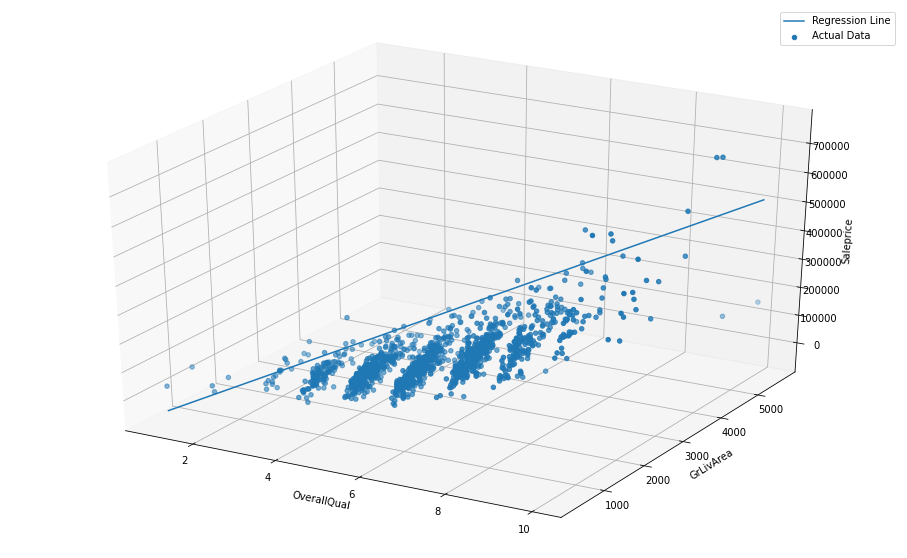

In [38]:
preds = reg_model.predict(dummy_feature)
plt.figure(figsize=(16,10))
axes = plt.axes(projection='3d')
axes.scatter(x['OverallQual'].values, x['GrLivArea'].values, y.values, label='Actual Data')
axes.plot3D(dummyX1, dummyX2, preds, label='Regression Line')
axes.set_xlabel('OverallQual')
axes.set_ylabel('GrLivArea')
axes.set_zlabel('Saleprice')
axes.legend()
plt.show()

# the model seems underfit, may be add more features


In [39]:
###
features = list(corr_data.columns[1:11])
features.pop(6) # check below coef_ negative value index no 6
features.pop(8) # check below coef_ negative value index no 8. last 9 but initially we removed 1, for this application coef_ nagative values updated
x = imputed_df[features]
y = imputed_df['SalePrice']

xtrain, xtest, ytrain,ytest = train_test_split(
    x, y, test_size=.3, random_state=42
)

In [40]:
# x = imputed_df[corr_data.columns[1:11]] # getting top 10 features, # getting value upto 4,5,6, 11, upto n; this will impact the model result or performance, 1 means excluding first one, e.g "SalesPrice"
# x = imputed_df[corr_data.columns[1:]] # getting all features

In [41]:
# corr_data.columns[1:5]  # just to view col names, no application

In [42]:
reg_model2 = LinearRegression()
reg_model2.fit(xtrain, ytrain)

LinearRegression()

In [43]:
ypred = reg_model2.predict(xtest)
mean_squared_log_error(ytest,ypred)   # return error if negative prediction not replaced by ZERO, initailly we got this error before replacement by 0

0.052338524015982865

In [44]:
# automate negative values
# ypred <0.0       
# ypred[ypred <0.0]  # getting the index number where it found negative values in a numpy array
ypred[ypred <0.0] = 0.0    # when there is negative score will be replaced by 0.0

In [45]:
mean_squared_log_error(ytest,ypred) # its working now when negative replaced by ZERO

0.052338524015982865

In [46]:
r2_score(ytest,ypred)  # little btter than previus one

0.7980422416041946

## Cros Validation

In [47]:
reg_model2.coef_  # see whether negative values, which to be solved

array([ 2.09063425e+04,  4.47955370e+01,  1.40942572e+04,  7.87944234e+00,
        1.24467440e+01,  1.46364600e+01, -4.34404860e+00,  3.31361826e+02])

In [48]:
def MSLE(ytrue,ypred):
  ypred[ypred < 0.0] == 0.0
  return mean_squared_log_error(ytrue, ypred)

In [49]:
# Cross Validation (Customized KFold)
from sklearn.model_selection import KFold

def crosss_validate(estimator, x,y, model_name=None, **params):
    folds = KFold(n_splits=7)
    scores = []
    iteration = 1
    for train_idx, test_idx in folds.split(x, y):
        # fetch train data index for that fold
        xtrain = x.iloc[train_idx]
        ytrain = y.iloc[train_idx]

        #fetch test data index for that fold
        xtest = x.iloc[test_idx]
        ytest = y.iloc[test_idx]

        # model
        model = estimator(**params)
        model.fit(xtrain, ytrain)
        ypred = model.predict(xtest)
        ypred[ypred<0.0] = 0.0

        # evaluate
        msle, r2 = mean_squared_log_error(y_true=ytest, y_pred=ypred), r2_score(y_true=ytest, y_pred=ypred)
        scores.append([msle, r2])
        print(f"Fold {iteration}.... Done")
        iteration += 1
    return pd.DataFrame([np.array(scores).mean(axis=0).tolist(),], columns=['Mean Squared LogError', 'R2_Score'], index=[model_name,]) # after this line, score will show as dataFrame 

In [50]:
scores = crosss_validate(LinearRegression, x, y, 'Linear Regression')

Fold 1.... Done
Fold 2.... Done
Fold 3.... Done
Fold 4.... Done
Fold 5.... Done
Fold 6.... Done
Fold 7.... Done


In [51]:
scores   # .2864 is the average cross valiated score

,Mean Squared LogError,R2_Score
Linear Regression,0.286452,0.747846


In [52]:
global_metrics= global_metrics.append(scores)

In [53]:
global_metrics

,Mean Squared LogError,R2_Score
Linear Regression,0.286452,0.747846


In [61]:
# scores.mean(axis=0)
[scores.mean(axis=0).tolist(),]   # list conversion & 2D dimension

[[0.28645222155186056, 0.7478456454960123]]

In [60]:
# scores    # msle & r2_score
# np.array(scores).mean()
# np.array(scores).mean(axis=0)  # column wise mean, mean of mlse & r2_score
np.array(scores).mean(axis=1)  # column wise mean over 7 folds

array([0.51714893])